Задача 5. Обучение без учителя

Левков Данил Андреевич (22.М05)

Выполнил задачи:
- Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- Выполнить разведочный анализ (EDA). При необходимости выполнить полезные преобразования данных.
- Самостоятельно реализуйте один из алгоритмов кластеризации, например K-means.
- Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из sklearn (KMeans, Affinity Propogation, DBSCAN и тд).
- При обучении использовать подбор гиперпараметров.
- Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- (+3 балла) Также снизить размерность данных с помощью метода главных компонент PCA и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- (+2 балла) Визуализировать данные снижением размерности до 2 или 3 с помощью PCA и t-SNE. В случае проблем с производительностью t-SNE, можно сначала до какой то степени снизить размерность с помощью PCA, а затем запустить t-SNE.

* Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.

В данном случае будем рассматриват базу данных различных пород деревьев в четырех районах Национального леса Рузвельта в Колорадо.
https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Считаем данные, выполним первичный анализ данных, при необходимости произведем чистку данных (Data Cleaning). Предварително отключим вывод ошибок, для получения более читаемых результатов

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/forest_type.csv')

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Описание датасета:
* Ключевой признак в данном случае - это Cover_Type.
* Остальные являются различными параметрами геометрии и позиционирования дерева, а также типов почвы
* Всего в базе данных 55 признаков

In [5]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Проверка на наличие выбросов

In [6]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [8]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

Все данные целочисленные и не имеют выбросов

Чистка данных не трубуется

* Выполнить разведочный анализ (EDA). При необходимости выполнить полезные преобразования данных.

In [10]:
df.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

Всего имеется 7 вариантов целевого признака. При этом, их распределение неравномерное. Имеет смысл выделить типы 3,4,5,6,7 в отдельный класс (3)

In [11]:
df.Cover_Type[df.Cover_Type >= 3] = 3

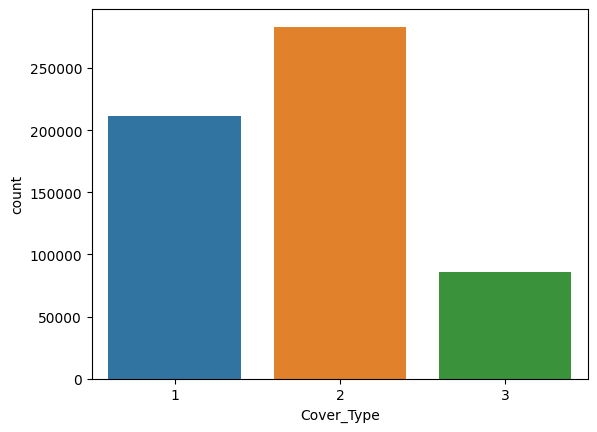

In [13]:
sns.countplot(x="Cover_Type", data=df)
plt.show()

Теперь признаки распределены сравнительно одинаково, с преобладанием второго типа

In [14]:
df.groupby('Cover_Type').mean()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,3128.644888,156.138227,13.127110,270.555245,42.156939,2614.834517,211.998782,223.430211,143.875038,2009.253517,...,0.056000,0.100821,0.085668,0.000444,0.004395,0.000066,0.00000,0.041206,0.037207,0.022781
2,2920.936061,152.060515,13.550499,279.916442,45.884219,2429.530799,213.844423,225.326596,142.983466,2168.154849,...,0.046625,0.104327,0.089333,0.005051,0.000042,0.000148,0.00000,0.002612,0.001264,0.001172
3,2668.543653,166.333861,18.338019,232.045696,58.696661,1435.273072,206.906162,216.419373,137.704044,1289.052928,...,0.006917,0.018691,0.019774,0.001002,0.011040,0.000734,0.00347,0.071083,0.064818,0.041830


Практически все геометрические значения в среднем не отличаются между разными типами деревьев. 

Достаточно сильно выделяются тоьлко параметры:
* Horizontal_Distance_To_Roadways
* Slope
* Horizontal_Distance_To_Roadways

А также некоторые качественные признаки (тип почвы) имеются только у одного из типов деревьев. Например:
* Soil_Type37

In [22]:
df.shape

(581012, 55)

Однако данных слишком много для обработки в обозримом времени. Поэтому уменьшим количество измерений до 

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

X_reduced, X_test, y_reduced, y_test = train_test_split(X, y, test_size=0.95, random_state=13)

X = X_reduced.values
y = y_reduced.values

In [29]:
X.shape

(29050, 54)

* Самостоятельно реализуйте один из алгоритмов кластеризации, например K-means.

In [15]:
from functions import MyKMeans

* Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из sklearn (KMeans, Affinity Propogation, DBSCAN и тд).

In [56]:
from prettytable import PrettyTable

results = PrettyTable(["Method", "time", "SI", "ARI", "AMI", "FMI"])

Будем рассмативать число кластеров от 3 до 7, и выберем среди результатов лучший.
Метрика silhouette_score будет определяющей

In [44]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
import time
def estimate(X, y, Estimator, str):
    clusters_num = range(3, 7)
    best_si = -1
    best_ari = -1
    best_ami = -1
    best_fmi = -1

    worst_time = 0

    for k in clusters_num:
        estimator = Estimator(k)
        start_time = time.time()
        estimator.fit(X)
        worst_time = max((time.time() - start_time), worst_time)
        predicted = estimator.predict(X)
        si = silhouette_score(X, predicted)
        
        best_si = max(best_si, si)
        
        if k == 3:
            best_ari = adjusted_rand_score(y, predicted)
            best_ami = adjusted_mutual_info_score(y, predicted)
            best_fmi = fowlkes_mallows_score(y, predicted)

    return [str, \
            worst_time, \
            best_si, \
            best_ari, \
            best_ami, \
            best_fmi]

In [57]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

comp_num = 54

results.add_row(estimate(X, y, MyKMeans, 'My k-means; ' + str(comp_num) + ' comp'))
results.add_row(estimate(X, y, KMeans, 'sklearn k-means; ' + str(comp_num) + ' comp'))
results.add_row(estimate(X, y, GaussianMixture, 'GaussianMixture; ' + str(comp_num) + ' comp'))

Accuracy is reached on iter:  28
Accuracy is reached on iter:  26
Accuracy is reached on iter:  30
Accuracy is reached on iter:  33


In [58]:
results

Method,time,SI,ARI,AMI,FMI
My k-means; 54 comp,4.830258131027222,0.4299096643791444,-0.014727169597743651,0.02824120264586744,0.41892417234443236
sklearn k-means; 54 comp,1.371936559677124,0.4299237362381271,-0.014720027967748262,0.028354367251157295,0.41887937320231716
GaussianMixture; 54 comp,5.3400719165802,-0.06956073363840165,0.10482740700875194,0.1293412996240129,0.4756751982450426


Оба метода к-средних показали очень походий результат по всем тестам. Однако собственная реализация медленнее библиотечной в 7 раз, что является следствием её наивной реализации.
GaussianMixture показал куда меньшее значение silhouette_score, чем остальные. В то время как на тестах ARI, AMI, FMI он повел себя немного лучше.

* Также снизить размерность данных с помощью метода главных компонент PCA и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.

In [59]:
from sklearn.decomposition import PCA
X_df = pd.DataFrame(X)
for comp_num in [5, 10, 20]:
    pca_estimator = PCA(n_components=comp_num)
    pca_estimator.fit(X_df)
    X_pca = pca_estimator.transform(X_df)
    results.add_row(estimate(X_pca, y, MyKMeans, 'My k-means; ' + str(comp_num) + ' comp'))
    results.add_row(estimate(X_pca, y, KMeans, 'sklearn k-means; ' + str(comp_num) + ' comp'))
    results.add_row(estimate(X_pca, y, GaussianMixture, 'GaussianMixture; ' + str(comp_num) + ' comp'))

Accuracy is reached on iter:  15
Accuracy is reached on iter:  51
Accuracy is reached on iter:  42
Accuracy is reached on iter:  37
Accuracy is reached on iter:  21
Accuracy is reached on iter:  25
Accuracy is reached on iter:  35
Accuracy is reached on iter:  57
Accuracy is reached on iter:  37
Accuracy is reached on iter:  22
Accuracy is reached on iter:  38
Accuracy is reached on iter:  43


In [60]:
results

Method,time,SI,ARI,AMI,FMI
My k-means; 54 comp,4.830258131027222,0.4299096643791444,-0.014727169597743651,0.02824120264586744,0.41892417234443236
sklearn k-means; 54 comp,1.371936559677124,0.4299237362381271,-0.014720027967748262,0.028354367251157295,0.41887937320231716
GaussianMixture; 54 comp,5.3400719165802,-0.06956073363840165,0.10482740700875194,0.1293412996240129,0.4756751982450426
My k-means; 5 comp,0.7506904602050781,0.43061323432258825,-0.01472194090254425,0.028295555983665795,0.4189208352547041
sklearn k-means; 5 comp,0.44033288955688477,0.4307458279927524,-0.014801297319168799,0.028334483268247626,0.4190643612761392
GaussianMixture; 5 comp,1.2705268859863281,0.2423229747676065,0.019958159087234303,0.04877543712759402,0.40670108730450694
My k-means; 10 comp,0.9444732666015625,0.4299226007956215,-0.01472194090254425,0.028295555983665795,0.4189208352547041
sklearn k-means; 10 comp,0.6545910835266113,0.4301813031151134,-0.014728296508907635,0.02829939454558767,0.4191301414229655
GaussianMixture; 10 comp,9.697502136230469,-0.06444672552135147,0.03235705275718968,0.027219854904895115,0.4248515199015042
My k-means; 20 comp,2.6758437156677246,0.4299224147936077,-0.01472194090254425,0.028295555983665795,0.4189208352547041


Большинство результатов остались неизменными. Однако стоит отметить, что GaussianMixture при оставленных 5-ти параметрах смог значительно улучшить показатель silhouette_score

* Визуализировать данные снижением размерности до 2 или 3 с помощью PCA и t-SNE. В случае проблем с производительностью t-SNE, можно сначала до какой то степени снизить размерность с помощью PCA, а затем запустить t-SNE.

снизим размерность данных до 3

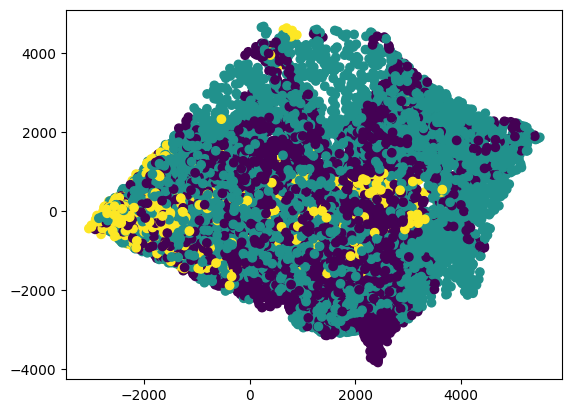

In [61]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

pca_estimator = PCA(n_components=3)
pca_estimator.fit(X_df)
X_3 = pca_estimator.transform(X_df)

plt.scatter(X_3[:, 0], X_3[:, 1], c=y)

plt.show()

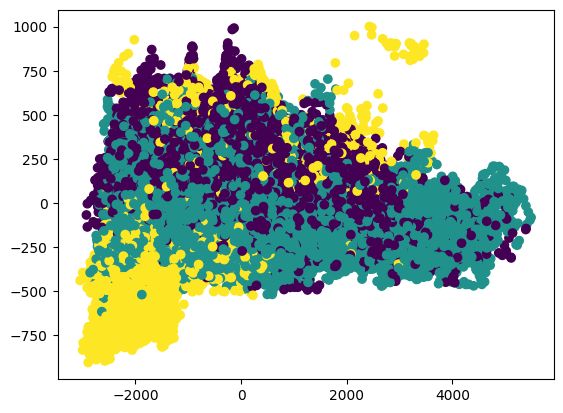

In [63]:
plt.scatter(X_3[:, 0], X_3[:, 2], c=y)

plt.show()

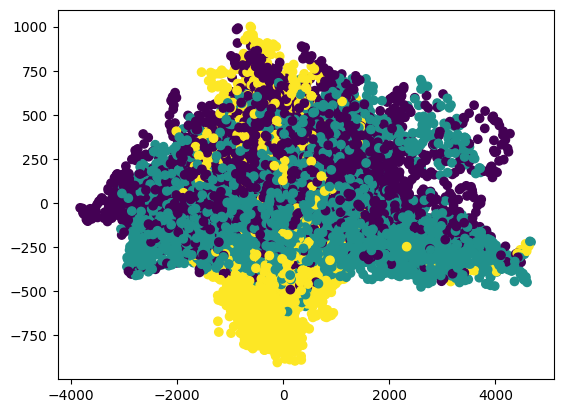

In [64]:
plt.scatter(X_3[:, 1], X_3[:, 2], c=y)
plt.show()

Из графиков видно, что pca позволило очень хорошо отделить третий тип (отмеченный желтым). Однако в данных параметрах, первые два типа остались перемешанными. То есть для них, большая часть полезной информации была потеряна

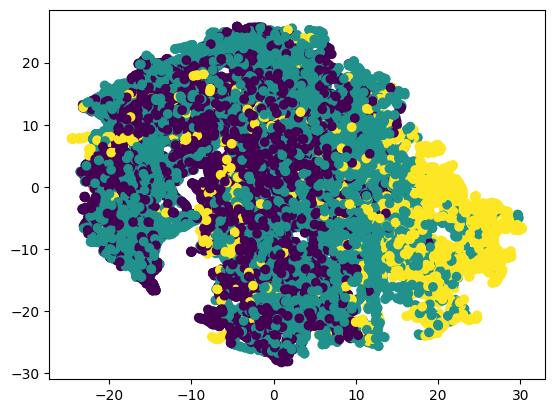

In [65]:
tsne_estimator = TSNE(n_components=3)
X_3_tsne = tsne_estimator.fit_transform(X_df)

plt.scatter(X_3_tsne[:, 0], X_3_tsne[:, 1], c=y)
plt.show()

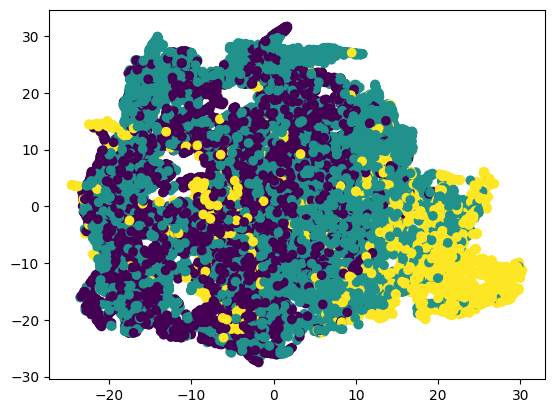

In [66]:
plt.scatter(X_3_tsne[:, 0], X_3_tsne[:, 2], c=y)
plt.show()

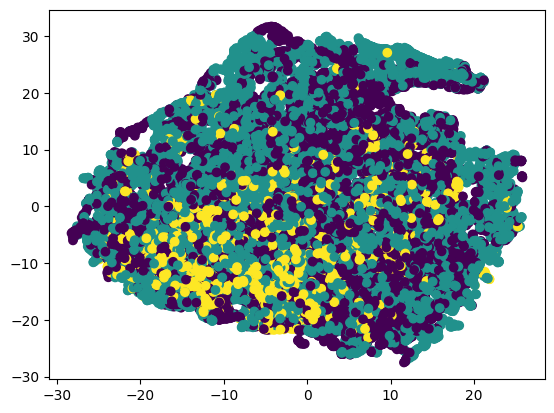

In [67]:
plt.scatter(X_3_tsne[:, 1], X_3_tsne[:, 2], c=y)
plt.show()

Использование TSNE заняло намного больше времени, хотя итоговый результат оказался сравним с PCA, а в некоторых аспектах даже хуже.